In [1]:
import numpy as np
import pandas as pd
import calendar
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import train_test_split

## 訓練資料整理

In [2]:
train = pd.read_csv('train.csv', engine='python',index_col="ID")
adr=train["adr"]
train_drop=train.drop(["is_canceled","adr","reservation_status","reservation_status_date"],axis=1)
train_drop=train_drop.fillna(0)
train_drop

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
ID,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0,0
1,City Hotel,257,2015,July,27,1,0,2,1,0.0,...,A,A,1,No Deposit,6.0,0.0,0,Transient,0,0
2,City Hotel,257,2015,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,6.0,0.0,0,Transient,0,0
3,City Hotel,257,2015,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,6.0,0.0,0,Transient,0,0
4,City Hotel,257,2015,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,6.0,0.0,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,Resort Hotel,19,2017,March,13,31,0,2,2,2.0,...,C,C,0,No Deposit,250.0,0.0,0,Transient,0,1
91527,Resort Hotel,28,2017,March,13,31,0,2,2,0.0,...,A,A,0,No Deposit,0.0,0.0,0,Transient,0,0
91528,Resort Hotel,2,2017,March,13,31,0,1,2,0.0,...,E,F,1,No Deposit,0.0,0.0,0,Transient,0,2


In [3]:
date=[]
month=["","January","February","March","April","May","June","July","August","September","October","November","December"]
for i in range(len(train)):
    mo=month.index(train["arrival_date_month"].iloc[i])
    if mo<10:
        mo="0"+str(mo)
    year=int(train["arrival_date_year"].iloc[i])
    day=int(train["arrival_date_day_of_month"].iloc[i])
    if int(day)<10:
        day="0"+str(day)
#     print(year)
    date.append(str(year)+"-"+str(mo)+"-"+str(day))

In [4]:
date_pd=pd.DataFrame(date,columns=["date"])
train_drop = pd.concat([date_pd,train_drop],axis=1)
train_drop
train_drop=train_drop.drop(["arrival_date_year","arrival_date_month","arrival_date_day_of_month","country","agent","company"],axis=1)
train_drop

,date,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,2015-07-01,Resort Hotel,342,27,0,0,2,0.0,0,BB,...,0,0,C,C,3,No Deposit,0,Transient,0,0
1,2015-07-01,City Hotel,257,27,0,2,1,0.0,0,HB,...,0,0,A,A,1,No Deposit,0,Transient,0,0
2,2015-07-01,City Hotel,257,27,0,2,2,0.0,0,HB,...,0,0,A,A,0,No Deposit,0,Transient,0,0
3,2015-07-01,City Hotel,257,27,0,2,2,0.0,0,HB,...,0,0,A,A,0,No Deposit,0,Transient,0,0
4,2015-07-01,City Hotel,257,27,0,2,2,0.0,0,HB,...,0,0,A,A,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,2017-03-31,Resort Hotel,19,13,0,2,2,2.0,0,BB,...,0,0,C,C,0,No Deposit,0,Transient,0,1
91527,2017-03-31,Resort Hotel,28,13,0,2,2,0.0,0,BB,...,0,0,A,A,0,No Deposit,0,Transient,0,0
91528,2017-03-31,Resort Hotel,2,13,0,1,2,0.0,0,BB,...,0,0,E,F,1,No Deposit,0,Transient,0,2
91529,2017-03-31,Resort Hotel,30,13,3,7,2,0.0,0,BB,...,0,0,A,A,0,No Deposit,0,Transient,0,1


In [5]:
# train_drop_du=train_drop.drop(["country"],axis=1)
train_drop_du=pd.get_dummies(train_drop, columns=["hotel","meal","market_segment","distribution_channel",
                                                  "reserved_room_type","assigned_room_type","deposit_type","customer_type"
                                                 ])
train_drop_du.columns

Index(['date', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D

## 計算每筆訂單的revenue

In [6]:
revenue=[]
for i in range(len(train_drop_du)):
    day=train_drop_du["stays_in_weekend_nights"].iloc[i]+train_drop_du["stays_in_week_nights"].iloc[i]
    revenue.append(adr.iloc[i]*day)

In [7]:
revenue

[-0.0,
 150.1044539489269,
 149.09280222034852,
 152.75257510338088,
 98.82329386207621,
 185.66577401358563,
 161.33472134161548,
 142.2767910634949,
 126.22852200664265,
 88.1472221090123,
 173.72394542953495,
 181.98541059319714,
 146.591893435733,
 133.00915137005566,
 175.0067513801337,
 152.28944310589614,
 144.91096492311704,
 126.56301003376065,
 166.17371576359153,
 164.9827171098699,
 140.17888466605888,
 127.8218475699685,
 107.38893693148808,
 137.72778983469144,
 140.15540898997838,
 164.72066262978194,
 154.50009588622748,
 156.19806133203988,
 140.56914239760368,
 147.44798690763474,
 336.49703221004273,
 125.92251909473494,
 112.12040098655024,
 95.2509251352043,
 70.51608216935527,
 69.48890379192196,
 146.93667575319824,
 107.20041597528295,
 137.12034377890336,
 114.22608928993999,
 98.57703757718755,
 156.00683448785333,
 160.44699493577184,
 157.51155998034469,
 136.53715730818013,
 90.26369778960427,
 155.98058127060008,
 159.64804691205612,
 147.30582531904625,
 

In [8]:
# date_pd=pd.DataFrame(date,columns=["date"])
train_adr = pd.concat([date_pd,train["is_canceled"],adr,pd.DataFrame(revenue,columns=["revenue"])],axis=1)
train_adr

,date,is_canceled,adr,revenue
0,2015-07-01,0,-6.305161,-0.000000
1,2015-07-01,0,75.052227,150.104454
2,2015-07-01,0,74.546401,149.092802
3,2015-07-01,0,76.376288,152.752575
4,2015-07-01,0,49.411647,98.823294
...,...,...,...,...
91526,2017-03-31,1,79.223571,158.447142
91527,2017-03-31,0,-6.822102,-13.644203
91528,2017-03-31,0,90.814554,90.814554
91529,2017-03-31,0,38.135565,381.355651


## 取出非取消的單子

In [9]:
train_adr_nocan=train_adr[train_adr["is_canceled"]==0]
train_adr_nocan

,date,is_canceled,adr,revenue
0,2015-07-01,0,-6.305161,-0.000000
1,2015-07-01,0,75.052227,150.104454
2,2015-07-01,0,74.546401,149.092802
3,2015-07-01,0,76.376288,152.752575
4,2015-07-01,0,49.411647,98.823294
...,...,...,...,...
91525,2017-03-31,0,79.453407,794.534075
91527,2017-03-31,0,-6.822102,-13.644203
91528,2017-03-31,0,90.814554,90.814554
91529,2017-03-31,0,38.135565,381.355651


#### 計算每日的revenue（包含取消的）

In [10]:
train_adr_day=train_adr[["date","adr","revenue"]].groupby(by=["date"]).sum()
train_adr_day

,adr,revenue
date,,
2015-07-01,8490.218248,25284.831806
2015-07-02,5938.812547,25539.763657
2015-07-03,4709.476079,18775.089341
2015-07-04,6301.681498,31676.296449
2015-07-05,4807.284096,25880.623515
...,...,...
2017-03-27,14325.917045,39139.448226
2017-03-28,5693.387155,20817.375255
2017-03-29,10538.395178,29316.063517


#### 計算每日的revenue（不含取消的）

In [11]:
train_adr_day_nocan=train_adr_nocan[["date","adr","revenue"]].groupby(by=["date"]).sum()
train_adr_day_nocan

,adr,revenue
date,,
2015-07-01,7094.546385,20311.186621
2015-07-02,3098.361671,16530.645277
2015-07-03,3270.453785,12966.714164
2015-07-04,3383.036737,17480.654256
2015-07-05,3614.545744,19591.458478
...,...,...
2017-03-27,9455.623924,26217.381380
2017-03-28,4502.192254,16185.177703
2017-03-29,8865.047802,24002.255525


#### 找出取消的單子

In [12]:
train_adr_can=train_adr[train_adr["is_canceled"]==1]
train_adr_can

,date,is_canceled,adr,revenue
23,2015-07-01,1,68.863895,137.727790
24,2015-07-01,1,70.077704,140.155409
25,2015-07-01,1,82.360331,164.720663
26,2015-07-01,1,77.250048,154.500096
27,2015-07-01,1,78.099031,156.198061
...,...,...,...,...
91507,2017-03-31,1,59.856011,119.712021
91510,2017-03-31,1,101.225162,506.125808
91515,2017-03-31,1,40.949747,81.899494
91523,2017-03-31,1,59.029780,59.029780


#### 計算每日的revenue（僅含取消的）

In [13]:
train_adr_day_ca=train_adr_can[["date","adr","revenue"]].groupby(by=["date"]).sum()
train_adr_day_ca

,adr,revenue
date,,
2015-07-01,1395.671864,4973.645185
2015-07-02,2840.450877,9009.118380
2015-07-03,1439.022294,5808.375177
2015-07-04,2918.644761,14195.642193
2015-07-05,1192.738352,6289.165037
...,...,...
2017-03-27,4870.293120,12922.066846
2017-03-28,1191.194901,4632.197552
2017-03-29,1673.347375,5313.807992


#### 計算每日非取消的單子的revenue佔全部單子的revenue的比例

In [14]:
cancel_revenue_rate=[]
# train_adr_day["cancel_revenue_rate"]=100*(1-(train_adr_day_ca/train_adr_day))
for i in range(len(train_adr_day)):
    cancel_revenue_rate.append(train_adr_day_nocan["revenue"].iloc[i]/train_adr_day["revenue"].iloc[i])

(array([  2.,   3.,  13.,  56., 146., 236., 142.,  37.,   3.,   2.]),
 array([0.06796736, 0.17893536, 0.28990335, 0.40087135, 0.51183935,
        0.62280734, 0.73377534, 0.84474333, 0.95571133, 1.06667932,
        1.17764732]),
 <BarContainer object of 10 artists>)

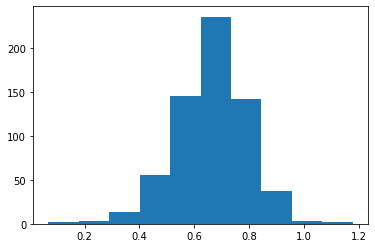

In [15]:
import matplotlib.pyplot as plt
plt.hist(cancel_revenue_rate)

In [16]:
np.mean(cancel_revenue_rate)

0.6649460333647802

In [17]:
np.max(cancel_revenue_rate)

1.177647319605336

## 訓練線性回歸模型

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import mean_squared_error,mean_absolute_error
X_train=train_drop_du.drop(["date"],axis=1)
# reg = LinearRegression().fit(train_drop_du,adr)
reg = LinearRegression()
# y_pred=reg.predict(train_drop_du)
# y_true=adr
# mean_squared_error(y_true, y_pred)
# scores = cross_validate(reg,train_drop_du,adr,cv=10,scoring=("neg_mean_squared_error","r2"))
# from sklearn.model_selection import cross_val_score
mse=cross_val_score(reg,X_train,adr,scoring='neg_mean_squared_error',cv=10)
print(mse.mean())
mae=cross_val_score(reg,X_train,adr,scoring='neg_mean_absolute_error',cv=10)
print(mae.mean())
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
# reg.predict()

-1646.003102618246
-26.521109004193534


In [19]:
reg = LinearRegression().fit(X_train,adr)
y_pred=reg.predict(X_train)
y_true=adr
print(mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))

1489.4570636984474
24.704288225086252


In [20]:
revenue_train=[]
for i in range(len(X_train)):
    day=X_train["stays_in_weekend_nights"].iloc[i]+X_train["stays_in_week_nights"].iloc[i]
    revenue_train.append(y_pred[i]*day)

In [21]:
train_adr_re=pd.concat([date_pd,pd.DataFrame(revenue_train,columns=["revenue"])],axis=1)
train_adr_re

,date,revenue
0,2015-07-01,0.000000
1,2015-07-01,142.628274
2,2015-07-01,155.254466
3,2015-07-01,155.254466
4,2015-07-01,155.254466
...,...,...
91526,2017-03-31,254.545840
91527,2017-03-31,-91.146414
91528,2017-03-31,100.159121
91529,2017-03-31,582.631430


In [22]:
train_adr_revenue=train_adr_re[["date","revenue"]].groupby(by=["date"]).sum()
train_adr_revenue

,revenue
date,
2015-07-01,27107.647113
2015-07-02,22067.331188
2015-07-03,16210.193750
2015-07-04,31880.167366
2015-07-05,24754.333411
...,...
2017-03-27,40387.087453
2017-03-28,25253.127509
2017-03-29,34023.943729


In [23]:
train_adr_revenue_mean=train_adr_revenue*np.mean(cancel_revenue_rate)
train_adr_revenue_mean

,revenue
date,
2015-07-01,18025.122421
2015-07-02,14673.584341
2015-07-03,10778.904034
2015-07-04,21198.590833
2015-07-05,16460.295810
...,...
2017-03-27,26855.233601
2017-03-28,16791.966967
2017-03-29,22624.086422


In [24]:
np.max(train_adr_revenue_mean)

revenue    85689.925547
dtype: float64

In [25]:
train_adr_revenue_mean_label=train_adr_revenue_mean["revenue"]/10000

In [26]:
train_adr_revenue_mean_label=pd.DataFrame(train_adr_revenue_mean_label.astype(int))
train_adr_revenue_mean_label

,revenue
date,
2015-07-01,1
2015-07-02,1
2015-07-03,1
2015-07-04,2
2015-07-05,1
...,...
2017-03-27,2
2017-03-28,1
2017-03-29,2


In [28]:
train_label = pd.read_csv('train_label.csv', engine='python',index_col="arrival_date")
train_label

,label
arrival_date,
2015-07-01,2.0
2015-07-02,1.0
2015-07-03,1.0
2015-07-04,1.0
2015-07-05,1.0
...,...
2017-03-27,2.0
2017-03-28,1.0
2017-03-29,2.0


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix_train=confusion_matrix(train_label, train_adr_revenue_mean_label)

In [30]:
confusion_matrix_train

array([[ 51,  40,   2,   1,   0,   0,   0,   0,   0,   0],
       [  2,  83,  57,  10,   0,   0,   0,   0,   0,   0],
       [  0,  29, 104,  44,   8,   1,   0,   0,   0,   0],
       [  0,   2,  38,  56,  24,   4,   0,   0,   0,   0],
       [  0,   0,   6,  25,  11,   3,   1,   0,   0,   0],
       [  0,   0,   0,  10,   7,   3,   1,   0,   0,   0],
       [  0,   0,   0,   0,   7,   5,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0]])

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 51  40   2   1   0   0   0   0   0   0]
 [  2  83  57  10   0   0   0   0   0   0]
 [  0  29 104  44   8   1   0   0   0   0]
 [  0   2  38  56  24   4   0   0   0   0]
 [  0   0   6  25  11   3   1   0   0   0]
 [  0   0   0  10   7   3   1   0   0   0]
 [  0   0   0   0   7   5   0   0   1   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]]


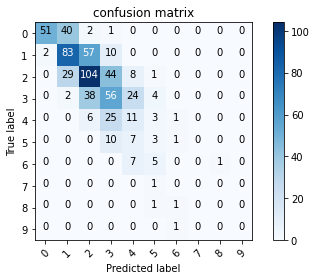

In [36]:
import matplotlib.pyplot as plt
import itertools
plt.figure()
plot_confusion_matrix(confusion_matrix_train,classes=[0,1,2,3,4,5,6,7,8,9],
                    title='confusion matrix')

plt.show()

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(train_label, train_adr_revenue_mean_label)

0.48125

In [38]:
mean_absolute_error(train_label, train_adr_revenue_mean_label)

0.6140625

## test資料整理

In [19]:
test = pd.read_csv('test.csv', engine='python',index_col="ID")
test_drop=test
# train_drop=train.drop(["is_canceled","country","adr","reservation_status","reservation_status_date","agent","company"],axis=1)
test_drop=test_drop.fillna(0)
test_drop

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
ID,,,,,,,,,,,,,,,,,,,,,
91531,City Hotel,75,2017,April,13,1,2,5,2,0.0,...,D,D,0,No Deposit,9.0,0.0,0,Transient,0,1
91532,City Hotel,208,2017,April,13,1,4,10,2,0.0,...,A,A,0,No Deposit,9.0,0.0,0,Transient,0,1
91533,Resort Hotel,12,2017,April,13,1,2,5,2,0.0,...,A,A,0,No Deposit,40.0,0.0,0,Contract,0,1
91534,City Hotel,76,2017,April,13,1,2,5,3,0.0,...,D,D,0,No Deposit,9.0,0.0,0,Transient,0,0
91535,City Hotel,9,2017,April,13,1,2,4,2,2.0,...,F,F,0,No Deposit,9.0,0.0,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Resort Hotel,108,2017,August,35,31,2,5,2,0.0,...,E,E,0,No Deposit,241.0,0.0,0,Transient,0,1
119386,Resort Hotel,194,2017,August,35,31,2,5,2,1.0,...,G,G,3,No Deposit,240.0,0.0,0,Transient,1,1
119387,Resort Hotel,17,2017,August,35,31,0,3,2,0.0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,0,2


In [20]:
date_test=[]
month=["","January","February","March","April","May","June","July","August","September","October","November","December"]
for i in range(len(test)):
    mo=month.index(test["arrival_date_month"].iloc[i])
    if mo<10:
        mo="0"+str(mo)
    year=int(test["arrival_date_year"].iloc[i])
    day=int(test["arrival_date_day_of_month"].iloc[i])
    if int(day)<10:
        day="0"+str(day)
#     print(year)
    date_test.append(str(year)+"-"+str(mo)+"-"+str(day))

In [21]:
date_test_pd=pd.DataFrame(date_test,columns=["date"])
test_drop=test_drop.reset_index()
test_drop = pd.concat([date_test_pd,test_drop],axis=1)
test_drop
test_drop=test_drop.drop(["arrival_date_year","arrival_date_month","arrival_date_day_of_month","country","agent","company"],axis=1)
test_drop

,date,ID,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,2017-04-01,91531,City Hotel,75,13,2,5,2,0.0,0,...,0,0,D,D,0,No Deposit,0,Transient,0,1
1,2017-04-01,91532,City Hotel,208,13,4,10,2,0.0,0,...,0,0,A,A,0,No Deposit,0,Transient,0,1
2,2017-04-01,91533,Resort Hotel,12,13,2,5,2,0.0,0,...,0,0,A,A,0,No Deposit,0,Contract,0,1
3,2017-04-01,91534,City Hotel,76,13,2,5,3,0.0,0,...,0,0,D,D,0,No Deposit,0,Transient,0,0
4,2017-04-01,91535,City Hotel,9,13,2,4,2,2.0,0,...,0,0,F,F,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854,2017-08-31,119385,Resort Hotel,108,35,2,5,2,0.0,0,...,0,0,E,E,0,No Deposit,0,Transient,0,1
27855,2017-08-31,119386,Resort Hotel,194,35,2,5,2,1.0,0,...,0,0,G,G,3,No Deposit,0,Transient,1,1
27856,2017-08-31,119387,Resort Hotel,17,35,0,3,2,0.0,0,...,0,0,A,A,0,No Deposit,0,Transient,0,2
27857,2017-08-31,119388,Resort Hotel,191,35,2,5,2,0.0,0,...,0,0,D,D,0,No Deposit,0,Contract,0,0


In [22]:
# train_drop_du=train_drop.drop(["country"],axis=1)
test_drop_du=pd.get_dummies(test_drop, columns=["hotel","meal","market_segment","distribution_channel",
                                                  "reserved_room_type","assigned_room_type","deposit_type","customer_type"
                                                 ])
test_drop_du.columns

Index(['date', 'ID', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'rese

In [23]:
X_test=test_drop_du.drop(["date","ID"],axis=1)

In [24]:
X_test

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,75,13,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,208,13,4,10,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,12,13,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,76,13,2,5,3,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,9,13,2,4,2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854,108,35,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27855,194,35,2,5,2,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27856,17,35,0,3,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27857,191,35,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### 補train跟test在dummy之後不同的欄位

In [25]:
# X_test=X_test.drop(['market_segment_Undefined','distribution_channel_Undefined', 'reserved_room_type_L','assigned_room_type_L']
#                          ,axis=1)
a=[0]*len(X_test)
market_segment_Undefined=pd.DataFrame(a,columns=["market_segment_Undefined"])
distribution_channel_Undefined=pd.DataFrame(a,columns=["distribution_channel_Undefined"])
reserved_room_type_L=pd.DataFrame(a,columns=["reserved_room_type_L"])
assigned_room_type_L=pd.DataFrame(a,columns=["assigned_room_type_L"])
customer_type_Transient_Party=pd.DataFrame(a,columns=["customer_type_Transient-Party"])

In [26]:
for i in range(len(X_test.columns)):
    print(i,X_test.columns[i])

0 lead_time
1 arrival_date_week_number
2 stays_in_weekend_nights
3 stays_in_week_nights
4 adults
5 children
6 babies
7 is_repeated_guest
8 previous_cancellations
9 previous_bookings_not_canceled
10 booking_changes
11 days_in_waiting_list
12 required_car_parking_spaces
13 total_of_special_requests
14 hotel_City Hotel
15 hotel_Resort Hotel
16 meal_BB
17 meal_FB
18 meal_HB
19 meal_SC
20 meal_Undefined
21 market_segment_Aviation
22 market_segment_Complementary
23 market_segment_Corporate
24 market_segment_Direct
25 market_segment_Groups
26 market_segment_Offline TA/TO
27 market_segment_Online TA
28 distribution_channel_Corporate
29 distribution_channel_Direct
30 distribution_channel_GDS
31 distribution_channel_TA/TO
32 reserved_room_type_A
33 reserved_room_type_B
34 reserved_room_type_C
35 reserved_room_type_D
36 reserved_room_type_E
37 reserved_room_type_F
38 reserved_room_type_G
39 reserved_room_type_H
40 reserved_room_type_P
41 assigned_room_type_A
42 assigned_room_type_B
43 assigned_ro

In [27]:
X_test_ch=pd.concat([X_test[X_test.columns[0:28]],market_segment_Undefined,X_test[X_test.columns[28:32]],
                        distribution_channel_Undefined,X_test[X_test.columns[32:40]],reserved_room_type_L,
                        X_test[X_test.columns[40:51]],assigned_room_type_L,X_test[X_test.columns[51:58]],customer_type_Transient_Party],axis=1)

In [28]:
X_test_ch

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,75,13,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,208,13,4,10,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,12,13,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,76,13,2,5,3,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,9,13,2,4,2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854,108,35,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27855,194,35,2,5,2,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27856,17,35,0,3,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27857,191,35,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### 預測adr

In [29]:
y_pred_test=reg.predict(X_test_ch)

In [116]:
y_pred_test

array([112.29485633,  58.47135061,  69.22592117, ...,  93.61489487,
        64.57705487,  96.80115571])

#### 計算訂單revenue

In [30]:
revenue_test=[]
for i in range(len(X_test_ch)):
    day=X_test_ch["stays_in_weekend_nights"].iloc[i]+X_test_ch["stays_in_week_nights"].iloc[i]
    revenue_test.append(y_pred_test[i]*day)

In [31]:
test_adr_re=pd.concat([date_test_pd,pd.DataFrame(revenue_test,columns=["revenue"])],axis=1)
test_adr_re

,date,revenue
0,2017-04-01,786.063994
1,2017-04-01,818.598909
2,2017-04-01,484.581448
3,2017-04-01,829.237571
4,2017-04-01,1088.935447
...,...,...
27854,2017-08-31,792.787525
27855,2017-08-31,1081.136790
27856,2017-08-31,280.844685
27857,2017-08-31,452.039384


#### 計算每日revenue

In [32]:
test_adr_revenue=test_adr_re[["date","revenue"]].groupby(by=["date"]).sum()
test_adr_revenue

,revenue
date,
2017-04-01,48312.754793
2017-04-02,35840.740068
2017-04-03,62172.837534
2017-04-04,32038.704017
2017-04-05,43066.307743
...,...
2017-08-27,57121.352838
2017-08-28,81970.853374
2017-08-29,39428.678808


#### 將revenue＊上面算出的非取消單的佔比

In [33]:
test_adr_revenue_mean=test_adr_revenue*np.mean(cancel_revenue_rate)
test_adr_revenue_mean

,revenue
date,
2017-04-01,32125.374661
2017-04-02,23832.157941
2017-04-03,41341.581701
2017-04-04,21304.009151
2017-04-05,28636.770505
...,...
2017-08-27,37982.616990
2017-08-28,54506.193803
2017-08-29,26217.943574


In [34]:
np.max(test_adr_revenue_mean)

revenue    66211.014334
dtype: float64

In [37]:
test_adr_revenue_mean_label=test_adr_revenue_mean["revenue"]/10000

In [38]:
test_adr_revenue_mean_label=pd.DataFrame(test_adr_revenue_mean_label.astype(int))
test_adr_revenue_mean_label

,revenue
date,
2017-04-01,3
2017-04-02,2
2017-04-03,4
2017-04-04,2
2017-04-05,2
...,...
2017-08-27,3
2017-08-28,5
2017-08-29,2


In [39]:
df = {'arrival_date': test_adr_revenue_mean_label.index, 'label': test_adr_revenue_mean_label["revenue"]}
test_label = pd.DataFrame(df)
test_label.to_csv(r'test_label.csv',index = False)

### 方法二：僅預測adr進行加總，不對取消進行處理

In [40]:
test_adr_revenue

,revenue
date,
2017-04-01,48312.754793
2017-04-02,35840.740068
2017-04-03,62172.837534
2017-04-04,32038.704017
2017-04-05,43066.307743
...,...
2017-08-27,57121.352838
2017-08-28,81970.853374
2017-08-29,39428.678808


In [41]:
test_adr_revenue_label=test_adr_revenue["revenue"]/10000
test_adr_revenue_label

date
2017-04-01    4.831275
2017-04-02    3.584074
2017-04-03    6.217284
2017-04-04    3.203870
2017-04-05    4.306631
                ...   
2017-08-27    5.712135
2017-08-28    8.197085
2017-08-29    3.942868
2017-08-30    3.001393
2017-08-31    4.574860
Name: revenue, Length: 153, dtype: float64

In [42]:
num=test_adr_revenue_label.astype(int)
num

date
2017-04-01    4
2017-04-02    3
2017-04-03    6
2017-04-04    3
2017-04-05    4
             ..
2017-08-27    5
2017-08-28    8
2017-08-29    3
2017-08-30    3
2017-08-31    4
Name: revenue, Length: 153, dtype: int64

In [43]:
test_adr_revenue_label=pd.DataFrame(test_adr_revenue_label.astype(int))
test_adr_revenue_label

,revenue
date,
2017-04-01,4
2017-04-02,3
2017-04-03,6
2017-04-04,3
2017-04-05,4
...,...
2017-08-27,5
2017-08-28,8
2017-08-29,3


In [45]:
df = {'arrival_date': test_adr_revenue_label.index, 'label': test_adr_revenue_label["revenue"]}
test_label = pd.DataFrame(df)
test_label.to_csv(r'test_label_nocan.csv',index = False)